In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = "whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import string
import re

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [3]:
# Read input NBA dataset
df = pd.read_csv("nba_elo.csv")

# Exploratory Data Analysis

In [4]:
df.columns

Index([u'date', u'season', u'neutral', u'playoff', u'team1', u'team2',
       u'elo1_pre', u'elo2_pre', u'elo_prob1', u'elo_prob2', u'elo1_post',
       u'elo2_post', u'carmelo1_pre', u'carmelo2_pre', u'carmelo1_post',
       u'carmelo2_post', u'carmelo_prob1', u'carmelo_prob2', u'score1',
       u'score2'],
      dtype='object')

In [6]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,NaN,NaN,NaN,NaN,NaN,NaN,66,68
1,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,NaN,NaN,NaN,NaN,NaN,NaN,63,47
2,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,NaN,NaN,NaN,NaN,NaN,NaN,59,53
3,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,NaN,NaN,NaN,NaN,NaN,NaN,56,51
4,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,NaN,NaN,NaN,NaN,NaN,NaN,33,50


Elo ratings are a measure of team strength based on head-to-head results, margin of victory and quality of opponent, while our CARMELO projections estimate a player’s future performance based on the trajectory of other, similar NBA players. Our CARM-Elo ratings, which power the forecast model, blend these two metrics to measure a team's quality based on both its game results and its roster. This forecast is based on 50,000 simulations of the rest of the season and accounts for team fatigue, travel distance to games, and home courts with higher altitudes. In forecasting the playoffs, the model also gives a bonus to teams with more playoff experience on their roster. In forecasting the draft lottery, the model takes unprotected draft picks into account. [https://projects.fivethirtyeight.com/2018-nba-predictions/]

In [7]:
df.shape

(67094, 20)

As the shape suggests,the dataset contains ~67000 instances and 20 attributes 

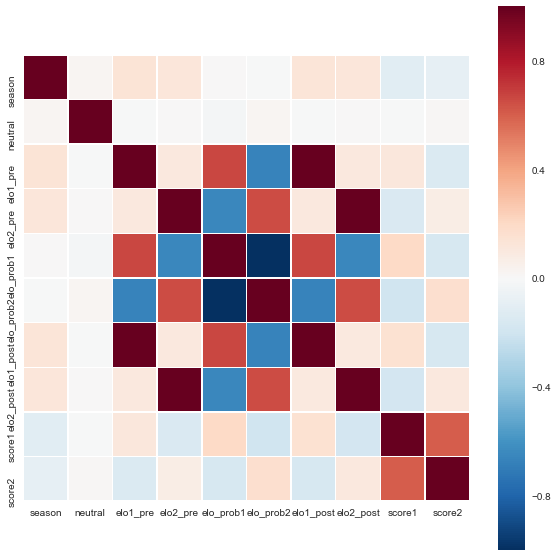

In [159]:
#Plotting correlation among all features in our dataframe

fig, ax = plt.subplots(figsize=(10,10)) 
cor = df.corr()
sns.heatmap(cor, square = True, linewidths=.5, ax=ax)

In [11]:
df.describe()

/Users/sirishat/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2
count,67094.000000,67094.000000,67094.000000,67094.000000,67094.000000,67094.000000,67094.000000,67094.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,67094.000000,67094.000000
mean,1989.890244,0.000402,1496.130655,1496.374871,0.621156,0.378844,1496.091962,1496.413564,1514.063424,1511.790884,1513.012250,1512.842057,0.627628,0.372372,104.694295,101.005112
std,18.353471,0.020057,112.541205,111.973834,0.178271,0.178271,112.997297,112.158110,119.434553,119.060992,119.884060,119.026822,0.192276,0.192276,14.837538,14.280889
min,1947.000000,0.000000,1105.617800,1091.644500,0.062616,0.018315,1100.291900,1085.774400,1187.730784,1192.842155,1187.730784,1192.004524,0.060474,0.013407,2.000000,0.000000
25%,1975.000000,0.000000,1418.390450,1418.476450,0.498694,0.240387,1417.754550,1418.616875,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,92.000000
50%,1992.000000,0.000000,1501.363800,1502.459350,0.640045,0.359955,1501.409100,1502.342150,NaN,NaN,NaN,NaN,NaN,NaN,105.000000,101.000000
75%,2006.000000,0.000000,1576.469050,1575.943150,0.759613,0.501306,1576.623625,1576.220050,NaN,NaN,NaN,NaN,NaN,NaN,114.000000,110.000000
max,2018.000000,1.000000,1855.779115,1865.449075,0.981685,0.937384,1860.313175,1865.449075,1872.690559,1881.619599,1876.930941,1881.619599,0.986593,0.939526,184.000000,186.000000


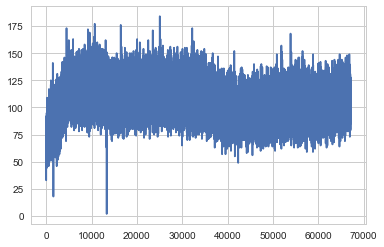

In [12]:
line = plt.figure()
plt.plot(df["score1"]);

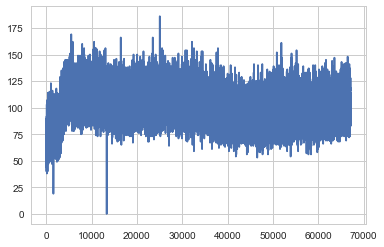

In [13]:
line = plt.figure()
plt.plot(df["score2"]);

In [14]:
df.isnull().sum()

date                 0
season               0
neutral              0
playoff          62814
team1                0
team2                0
elo1_pre             0
elo2_pre             0
elo_prob1            0
elo_prob2            0
elo1_post            0
elo2_post            0
carmelo1_pre     63157
carmelo2_pre     63157
carmelo1_post    63157
carmelo2_post    63157
carmelo_prob1    63157
carmelo_prob2    63157
score1               0
score2               0
dtype: int64

Since we can see that almost 90% of the fields for columns with carmelo predictions are null. This makes sense because when compated to the Elo predictions, the Carmelo predictions are relatively new. For our analysis purposes, having so many null values will not be very useful. Since the dataset contains two different predictions, I have decided to only use the Elo predictions for building my model.

In [25]:
df = df.drop(['playoff'],axis=1)

In [ ]:
df = df.drop(['carmelo1_pre', 'carmelo2_pre', 'carmelo1_post', 'carmelo2_post',
        'carmelo_prob1', 'carmelo_prob2'],axis=1)

Removed all the Carmelo columns, along with playoffs column 

In [28]:
df.head()

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2
0,1946-11-01,1947,0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,66,68
1,1946-11-02,1947,0,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,63,47
2,1946-11-02,1947,0,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,59,53
3,1946-11-02,1947,0,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,56,51
4,1946-11-02,1947,0,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,33,50


In [29]:
df.isnull().sum()

date         0
season       0
neutral      0
team1        0
team2        0
elo1_pre     0
elo2_pre     0
elo_prob1    0
elo_prob2    0
elo1_post    0
elo2_post    0
score1       0
score2       0
dtype: int64

Now the dataset contains no null values

# Feature Engineering

In [32]:
group1 = df.groupby('team1')
group1.size().head()

team1
ANA      41
AND      38
ATL    2162
BAL     486
BLB     278
dtype: int64

In [44]:
#Function for getting the total number of games played by each team
def num_of_games(team):
    return len(df.loc[df["team1"] == team])+len(df.loc[df["team2"] == team])

In [37]:
#Getting the list of all the teams present(unique)

teams = set(df["team1"]).union(set(df["team2"]))
len(teams)

102

In [50]:
#Calling the function to store total number of games played by each team. X contains the list of all teams, y contains
# count of total games played by them

x = list(teams)
y = [num_of_games(i) for i in x]


In [51]:
total_games = pd.DataFrame([x,y])
total_games

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,MIL,GSW,MIN,MIA,BOS,OAK,NYK,NYN,NYA,SAC,...,UTA,STB,STL,MLH,UTS,HOU,SDR,SDS,SDA,SDC
1,4293,4009,2382,2636,6286,172,6015,82,736,2734,...,3413,249,1121,281,499,4099,334,11,263,492


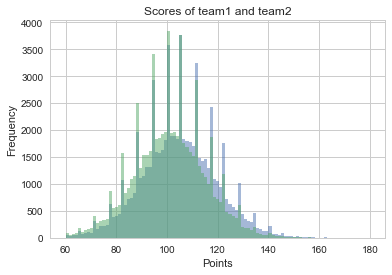

In [54]:
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Scores of team1 and team2")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.hist(df["score1"],bins, alpha=0.5)
plt.hist(df["score2"],bins, alpha=0.5)
plt.show()

In [57]:
#Getting winning and losing teams scores from the dataframe
scores = pd.DataFrame([df["score1"],df["score2"]])
winner_scores = scores.max(0)
looser_scores = scores.min(0)

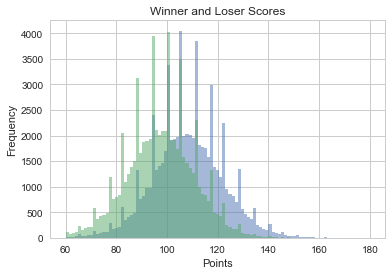

In [72]:
#Plotting winning vs losing scores
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Winner and Loser Scores")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.hist(winner_scores,bins, alpha=0.5)
plt.hist(looser_scores,bins, alpha=0.5)
plt.show()

Let's assume that Team1 is the home team and Team 2 is the Away team

In [66]:
#Copying the dataframe into another df
nba = df

In [67]:
nba.head()

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2
0,1946-11-01,1947,0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,66,68
1,1946-11-02,1947,0,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,63,47
2,1946-11-02,1947,0,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,59,53
3,1946-11-02,1947,0,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,56,51
4,1946-11-02,1947,0,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,33,50


In [68]:
# Create a new feature that says true or false, based on whether the home team wins or loses respectively. 
y = nba["score1"]>nba["score2"]
y.head()

0    False
1     True
2     True
3     True
4    False
dtype: bool

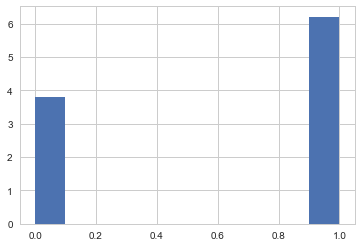

In [71]:
# Plotting the home teams wins and losses
plt.hist(y, density=True);

As we can see from the histogram above, the accuracy of the home team(team1) winning is over 60%

In [96]:
# Create a feature that analyses the wins and loses based on elo probability predictions 
n=len(nba["elo_prob1"])
y = nba["score1"]>nba["score2"]
y2=np.zeros(n)
elo_winner=np.zeros(n)
elo_loser=np.zeros(n)
for i in range(n):
    if y[i]:
        elo_winner[i]=nba["elo_prob1"][id]
        elo_loser[i]=nba["elo_prob2"][id]
    else:
        elo_winner[i]=nba["elo_prob2"][id]
        elo_loser[i]=nba["elo_prob1"][id]

y2 = elo_winner <= elo_loser
y2

array([False,  True,  True, ...,  True, False, False], dtype=bool)

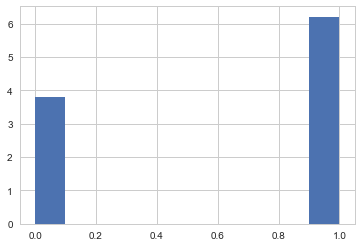

In [97]:
# Accuracy of above classifier with elo probabilities
plt.hist(y2, density=True);

As we can see from the plot above, the chances of the teams win based on elo probabilities is >60%

In [98]:
# Create a feature that analyses the wins and loses based on elo post match ratings 
n=len(nba["elo1_post"])
y = nba["score1"]>nba["score2"]
y2=np.zeros(n)
elo_winner=np.zeros(n)
elo_loser=np.zeros(n)
for i in range(n):
    if y[i]:
        elo_winner[i]=nba["elo1_post"][id]
        elo_loser[i]=nba["elo2_post"][id]
    else:
        elo_winner[i]=nba["elo2_post"][id]
        elo_loser[i]=nba["elo1_post"][id]

y2 = elo_winner <= elo_loser
y2

array([False,  True,  True, ...,  True, False, False], dtype=bool)

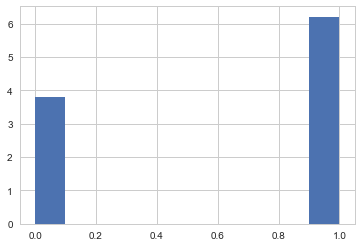

In [99]:
# Accuracy of above classifier with post match elo ratings 
plt.hist(y2, density=True);

Even using the post match ratings from Elo, the accuracy of prediction seems to be >60%, which is similar to their probability values

In [357]:
#Adding a new column in the dataframe with the home teams(team1) wins and losses 
y = pd.DataFrame(df["score1"]>df["score2"],index=np.arange(len(df["score1"])),columns=["team1_wins"])
X = df.join(y)
X.head()

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2,team1_wins
0,1946-11-01,1947,0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,66,68,False
1,1946-11-02,1947,0,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,63,47,True
2,1946-11-02,1947,0,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,59,53,True
3,1946-11-02,1947,0,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,56,51,True
4,1946-11-02,1947,0,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,33,50,False


From the above dataset, we can see that we do not really have any use from the columns- date, season, neutral, elo1_pre, elo2_pre. 
We shall drop those columns from the dataframe for further analysis

In [358]:
#Dropping unnecessary columns from the dataframe 

X = X.drop(['neutral'],axis=1)
X = X.drop(['date'],axis=1)
X = X.drop(['season'],axis=1)

In [359]:
X.head()

,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2,team1_wins
0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,66,68,False
1,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,63,47,True
2,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,59,53,True
3,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,56,51,True
4,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,33,50,False


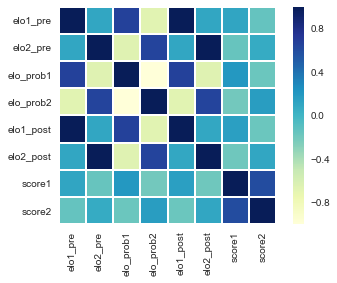

In [456]:
# Finding correlation among certain columns from df
cor = X[['elo1_pre','elo2_pre','elo_prob1','elo_prob2','elo1_post','elo2_post','score1','score2']].corr()

sns.heatmap(cor, square = True,linewidths= 1,cmap="YlGnBu")

As we can see from the correlation above, the probabilities and elo post ratings are highly co-related. Since this is what we obtained from our classifiers previously as well, we will further extract more features from the probabilities and post game Elo ratings to get better prediction accuracy

In [361]:
#Adding additional features into the dataframe using the probabilities and ratings from Elo 

#Difference between post match ratings of the two teams
x0 = pd.DataFrame(X['elo2_post']-X['elo1_post'])
x0 = x0.rename(columns={0:'post_diff'})

#Inverse of the probability of team 1
x1 = pd.DataFrame(1/X['elo_prob1'])
x1 = x1.rename(columns={'elo_prob1':'prob1_inv'})

#Inverse of probability of team 2
x2 = pd.DataFrame(1/X['elo_prob2'])
x2 = x2.rename(columns={'elo_prob2':'prob2_inv'})

#Product of probabilities
x3 = pd.DataFrame(X['elo_prob1']*X['elo_prob2'])
x3 = x3.rename(columns={0:'prod_probs'})

#Final dataframe after concatenating new features 
X_fin = pd.concat([X,x0,x1,x2,x3],axis=1)

In [362]:
X_fin.head()

,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2,team1_wins,post_diff,prob1_inv,prob2_inv,prod_probs
0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,66,68,False,13.4466,1.562341,2.778279,0.230382
1,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,63,47,True,-12.5809,1.584532,2.710770,0.232812
2,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,59,53,True,-10.3084,1.562341,2.778279,0.230382
3,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,56,51,True,-9.3816,1.562341,2.778279,0.230382
4,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,33,50,False,40.7622,1.562341,2.778279,0.230382


In [363]:
#Adding percent of scores feature
per1 = []
per2 = []
for i,x in X_fin.iterrows():
    per1.append(float(x['score1'])/(x['score1'] + x['score2']))
    per2.append(float(x['score2'])/(x['score1'] + x['score2']))
    

X_fin['per1'] = pd.DataFrame(per1, index=X_fin.index)
X_fin['per2'] = pd.DataFrame(per2, index=X_fin.index)
    

In [364]:
X_fin.head()

,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,score1,score2,team1_wins,post_diff,prob1_inv,prob2_inv,prod_probs,per1,per2
0,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,1293.2767,1306.7233,66,68,False,13.4466,1.562341,2.778279,0.230382,0.492537,0.507463
1,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,1309.6521,1297.0712,63,47,True,-12.5809,1.584532,2.710770,0.232812,0.572727,0.427273
2,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,1305.1542,1294.8458,59,53,True,-10.3084,1.562341,2.778279,0.230382,0.526786,0.473214
3,STB,PIT,1300.0,1300.0000,0.640065,0.359935,1304.6908,1295.3092,56,51,True,-9.3816,1.562341,2.778279,0.230382,0.523364,0.476636
4,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,1279.6189,1320.3811,33,50,False,40.7622,1.562341,2.778279,0.230382,0.397590,0.602410


# Regression Model

In [405]:
# Splitting the data into training/testing sets
from sklearn.model_selection import train_test_split
X_train=X_fin.sample(frac=0.7,random_state=0)
X_test=X_fin.drop(X_train.index)

In [437]:
#Building a Linear Regression Model
reg1 = LinearRegression()

#Selecting only numeric features from the dataframe for our model
fit_features = ['elo1_pre','elo1_post','elo_prob1','post_diff','prob1_inv','prod_probs','per1','score2']
X_tr = X_train[fit_features]
Y_tr = X_train['score1']

#Fitting a model to predict score1 for home teams
reg1.fit(X_tr ,Y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [438]:
reg1.score(X_tr,Y_tr)

0.98694300605551299

In [439]:
X_te = X_test[fit_features]
Y_te = X_test['score1']
Y = reg1.predict(X_te)
Y

array([  62.64943461,   75.72491929,   75.86612073, ...,  110.93751867,
         91.38325139,   98.59161446])

In [440]:
reg1.score(X_te, Y_te)

0.97969997232510497

In [441]:
# Calculating mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_te, Y))

# Calculating variance score
print('Variance score: %.2f' % r2_score(Y_te, Y))

Mean squared error: 4.50
Variance score: 0.98


In [442]:
#Building 2nd Linear Regression Model
reg2 = LinearRegression()

#Selecting only numeric features from the dataframe for our model
fit_features = ['elo2_pre','elo2_post','elo_prob2','post_diff','prob2_inv','prod_probs','per2']
X_tr = X_train[fit_features]
Y_tr = X_train['score2']

#Fitting a model to predict score2 for away teams
reg2.fit(X_tr ,Y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [443]:
reg2.score(X_tr,Y_tr)

0.19678614524919025

In [444]:
X_te = X_test[fit_features]
Y_te = X_test['score2']
Y = reg2.predict(X_te)
Y

array([  98.23517282,   94.80774919,   97.77043767, ...,   98.33839949,
        102.65257855,  100.23941335])

In [445]:
reg2.score(X_te, Y_te)

0.19672420536324331

In [451]:
#Building a Logistic Regression classifier to predict home team wins 
classifier = LogisticRegression()

fit_features = ['elo1_post','elo2_post','elo_prob1','elo_prob2','per1','per2']
x = X_train[fit_features]
y = X_train['team1_wins']

classifier.fit(x ,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [452]:
classifier.score(x,y)

0.95688370310437343

In [454]:
X_te = X_test[fit_features]
Y_te = X_test['team1_wins']
Y = classifier.predict(X_te)
Y

array([ True,  True,  True, ...,  True, False,  True], dtype=bool)

In [455]:
classifier.score(X_te, Y_te)

0.95801868044515104

In [446]:
# Calculating mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_te, Y))

# Calculating variance score
print('Variance score: %.2f' % r2_score(Y_te, Y))

Mean squared error: 163.00
Variance score: 0.20


In [428]:
#Building a Logistic Regression Model
reg3 = LogisticRegression()

#Selecting only numeric features from the dataframe for our model
fit_features = ['elo1_pre','elo1_post','elo_prob1','post_diff','prob1_inv','prod_probs','per1']
X_tr = X_train[fit_features]
Y_tr = X_train['score1']

#Fitting a model to predict score1 for home teams
reg3.fit(X_tr ,Y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [429]:
reg3.score(X_tr,Y_tr)

0.032598049652940428

In [430]:
X_te = X_test[fit_features]
Y_te = X_test['score2']
Y = reg3.predict(X_te)
Y

array([107, 107, 107, ..., 107,  97, 106])

In [431]:
reg3.score(X_te, Y_te)

0.022903418124006359

The Elo ratings don't seem to be enough to give consistent results for the two different regression models that I used - Linear and Logistic. Although Linear regression  gives us slightly better results, I don't think they are acuurate enough to predict team scores. Maybe the data provided is not sufficient to build a good regression model, where we can see clearer results. I tried to extract features from the given probabilities and ratings, but they did not seem to provide much additional benefit to improve our regression model. The classifier that predicts the home team wins using Logistic Regression had pretty good accuracy. 